<a href="https://colab.research.google.com/github/CesarMagnoJr/CeNN/blob/main/Lorenz_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTAÇÃO DAS BIBLIOTECAS
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randn
from scipy.integrate import solve_ivp

In [2]:
# Numero de Iteraçoes de Lorenz e Valores p/ modelar Lorenz
EPC = 20001
Ro = 32
Bt = 8/3
P = 10
Bias = 0


LORENZ (ALGORITMO DE LORENZ POR CNN)
---



In [9]:
# CONVERSÃO DA IMAGEM P/ ESCALA DE CINZA E DEFINIÇÃO DAS DIMENSÕES
image = [1,3,5]
mat_x = (np.array(image))
z0 = mat_x.astype(float)

selffeedback_template = [[1-P       ,P       ,0],
                         [Ro       ,0     ,0],
                         [0        ,0       ,1-Bt]]
# ABERTURA DAS MATRIZES
X=[]
Y=[]
Z=[]
linha_x=[]
OBS = [[],[],[]]
lista_obs = []

# DERIVADA
funcao_deriv = lambda a, b, x, y, z, bs : -x + y + z + bs
for t in range(0,EPC,1):
    for i in range(0,3,1):
        non_linear_template = [[0         ,0       ,    0],
                               [(-z0[2])  ,0       ,    0],
                               [z0[1]     ,0       ,    0]]

        Cx = z0[0]*selffeedback_template[i][0] + z0[1]*selffeedback_template[i][1] + z0[2]*selffeedback_template[i][2]
        Nl = z0[0]*non_linear_template[i][0]  +  z0[1]*non_linear_template[i][1]   + z0[2]*non_linear_template[i][2]

        # CALCULO DA DERIVADA PONTO A PONTO
        x_deriv = funcao_deriv(0,0,z0[i],Cx,Nl,Bias)

        # CALCULO DA INTEGRAL PONTO A PONTO
        x_integ = solve_ivp(funcao_deriv,[0,0.001],[z0[i]],args=(z0[i],Cx,Nl,Bias), method='RK45')
        # MONTAGEM DA LINHA DA MATRIZ
        x_novo = float(x_integ.y[0][1])
        linha_x.append(x_novo)

    # VERIFICANDO SE DX ESTÁ CONVERGINDO PARA 0. CASO NÃO ESTEJA OBEDECENDO A CONDIÇÃO, VOLTA PARA MAIS UMA ÉPOCA DE LOOP.
    z0 = linha_x
    X.append(z0[0])
    Y.append(z0[1])
    Z.append(z0[2])
    linha_x=[]

PLOT 3D

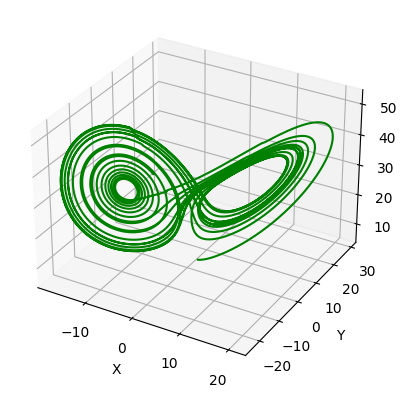

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X, Y, Z, color='green')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

EIXO X

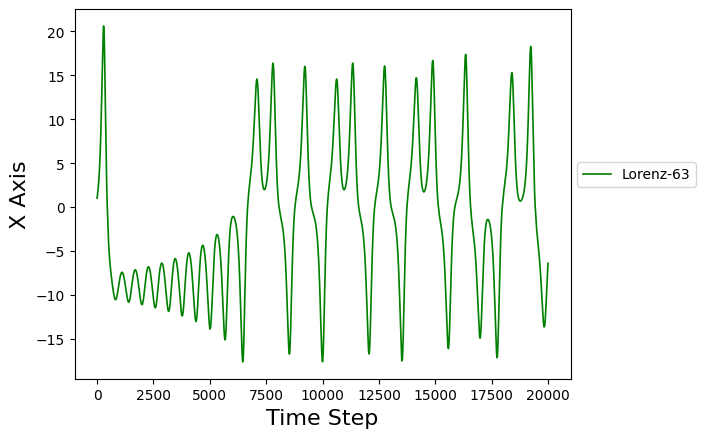

In [13]:
ax = plt.axes(projection=None)
ax.plot(X, 'green',linewidth=1.2, label='Lorenz-63')
plt.xlabel('Time Step',fontsize=16)
plt.ylabel('X Axis',fontsize=16)
legend = ax.legend(shadow=True)
plt.legend(bbox_to_anchor =(1, 0.605))
plt.savefig('X3D.png', format='png',bbox_inches="tight")
plt.show()